<a href="https://colab.research.google.com/github/chelseaangeles/programming-assignment-2/blob/main/Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 2: Linear Regression**

> Group Members:
1. Angeles, Chelsea R.
2. Reyes, Rychard Andrei C.
3. Soriano, Adelyn Joyce S.

# ***General Guidelines***

## **1. Dataset Preparation**

### Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Load dataset

In [ ]:
# Load the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(data_url)

("Dataset Overview:")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
# Check for Null Values

pd.isnull(df).sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


### Target heating load only

In [ ]:
# Select features (X1 to X8) and target (Y1: Heating Load)
X = df.iloc[:, :-2]  # Features
Y = df.iloc[:, -2]   # Heating load

# Print an overview
print("Features (X):")
X  # Display the rows of features

Features (X):


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
print("\nTarget (Y): Heating Load")
Y  # Display the values of the target


Target (Y): Heating Load


,Y1
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


### Splitting samples

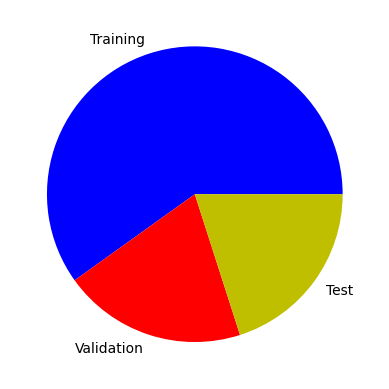

In [ ]:
# Split the data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Print a visual representation of the percentages of the split datasets
training = len(X_train)  # Get the size of the training set
validation = len(X_val)  # Get the size of the validation set
testing = len(X_test)  # Get the size of the test set

p = [training, validation, testing]  #'p' contains the sizes
mylabels = ["Training", "Validation", "Test"]

plt.pie(p, colors=['b','r','y'], labels=mylabels)
plt.show()

## **2. Ridge Regression and Hyperparameter Tuning**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Define 10 different regularization parameters
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 500, 1000]

# Train Ridge models with different alphas
best_ridge = None
best_alpha = None
best_r2 = -float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Evaluate on validation set
    y_val_pred = ridge.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)

    if val_r2 > best_r2:
        best_r2 = val_r2
        best_alpha = alpha
        best_ridge = ridge

print(f"Best alpha: {best_alpha}, Best validation R2: {best_r2}")


Best alpha: 0.0001, Best validation R2: 0.9050212036135079


## **3. Final Evaluation on the Test Data**

R2 Score: 0.920
Mean Squared Error (MSE): 7.902
Root Mean Squared Error (RMSE): 2.811
Normalized Mean Squared Error (NMSE): 0.080


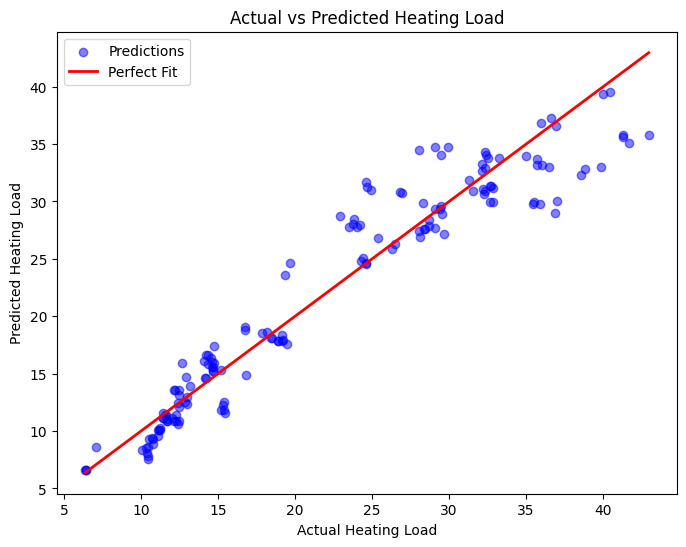

In [ ]:
# Train the final Ridge model using the best alpha
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train, y_train)

# Predict on the test set
y_test_pred = ridge_final.predict(X_test)

# Compute metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_nmse = test_mse / np.var(y_test)

# Print results
print(f"R2 Score: {test_r2:.3f}")
print(f"Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")
print(f"Normalized Mean Squared Error (NMSE): {test_nmse:.3f}")

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend(loc="upper left")
plt.show()

## **4. Best Model’s Coefficients, Intercept, and its Training, Validation, and Test Accuracy**

In [ ]:
# Print the best model's coefficients
print("Coefficients:", [f"{coef:.3f}" for coef in ridge_final.coef_])

# Print the intercept
print(f"Intercept: {ridge_final.intercept_:.3f}")

# Calculate and print the training accuracy
train_r2 = r2_score(y_train, ridge_final.predict(X_train))
print(f"Training Accuracy: {train_r2:.3f}")

# Calculate and print the validation accuracy
print(f"Validation Accuracy: {best_r2:.3f}")

# Print the test accuracy (already calculated)
print(f"Test Accuracy: {test_r2:.3f}")

Coefficients: ['-59.842', '-0.057', '0.037', '-0.047', '4.162', '-0.018', '20.160', '0.244']
Intercept: 75.663
Training Accuracy: 0.918
Validation Accuracy: 0.905
Test Accuracy: 0.920


## **5. Top 5 Features Among X1 to X8**

<ipython-input-16-1ed77b0370bb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


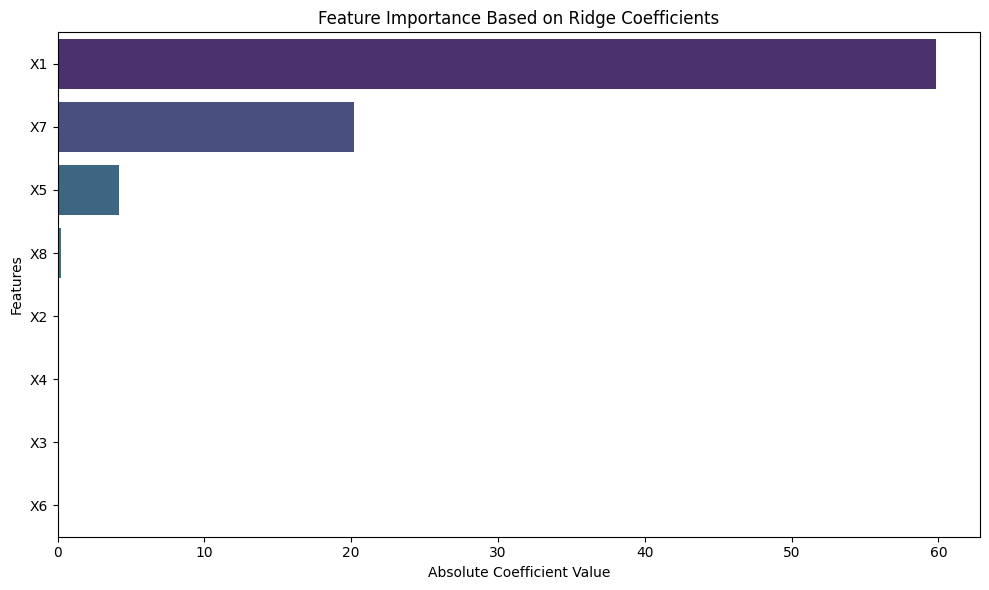

Top 5 Features: ['X1', 'X7', 'X5', 'X8', 'X2']


In [ ]:
# Get coefficients and feature importance
coefficients = best_ridge.coef_
feature_importance = pd.Series(coefficients, index=X.columns).abs().sort_values(ascending=False)
top_5_features = feature_importance.index[:5]

# Visualization: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance Based on Ridge Coefficients")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#Display Final Results
print("Top 5 Features:", list(top_5_features))

## **6. If you repeat the procedure above using only the 5 top features, what are the results?**

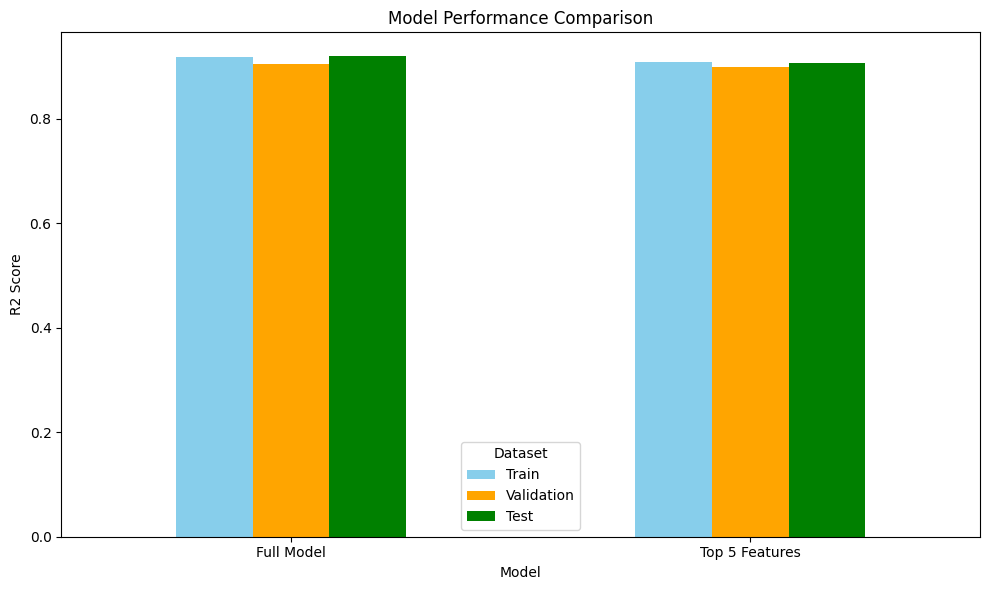

Performance Comparison:
                Train R2  Validation R2   Test R2
Model                                            
Full Model      0.918186       0.905021  0.919588
Top 5 Features  0.908862       0.898826  0.907127


In [ ]:
# Model with top 5 features
X_train_top5 = X_train[top_5_features]
X_val_top5 = X_val[top_5_features]
X_test_top5 = X_test[top_5_features]

model_top5 = Ridge(alpha=best_alpha)
model_top5.fit(X_train_top5, y_train)

# Evaluate models
y_train_pred_top5 = model_top5.predict(X_train_top5)
y_val_pred_top5 = model_top5.predict(X_val_top5)
y_test_pred_top5 = model_top5.predict(X_test_top5)

train_score_top5 = r2_score(y_train, y_train_pred_top5)
val_score_top5 = r2_score(y_val, y_val_pred_top5)
test_score_top5 = r2_score(y_test, y_test_pred_top5)

# Compare Performance
train_score_full = r2_score(y_train, best_ridge.predict(X_train))
val_score_full = r2_score(y_val, best_ridge.predict(X_val))
test_score_full = r2_score(y_test, best_ridge.predict(X_test))

performance_data = pd.DataFrame({
    "Model": ["Full Model", "Top 5 Features"],
    "Train R2": [train_score_full, train_score_top5],
    "Validation R2": [val_score_full, val_score_top5],
    "Test R2": [test_score_full, test_score_top5]
}).set_index("Model")

# Visualization: Model Performance
performance_data.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "green"])
plt.title("Model Performance Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(["Train", "Validation", "Test"], title="Dataset")
plt.tight_layout()
plt.show()

# Display Final Results
print("Performance Comparison:")
print(performance_data)

# ***Guide Questions***

> **1. What is the impact of removing certain features on the model’s performance?**
*   *Removing certain features can significantly affect a model's performance. If important features are removed, accuracy may drop as valuable information is lost, but removing irrelevant ones can simplify the model and reduce overfitting. This balance is aided by ridge regularization, which stabilizes the model by prioritizing essential features. Also, focusing on the top 5 features can often maintain accuracy while making the model more efficient. Hence, the effect depends on the importance of the features removed.*

> **2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**
*   *Without splitting the data, the model risks overfitting by learning noise or details specific to the training data, making it unable to generalize well to unseen data. A lack of a validation set prevents proper tuning of hyperparameters, while the absence of a test set hinders accurate evaluation of the model's performance on new data.*

> **3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**
*   *The generalization ability of a model can be assessed using test data by evaluating its performance on unseen samples that were not used during training or validation. This ensures that the model's predictions are not overfitted to the training data but are reflective of its ability to perform well on new, real-world data.*
* *To ensure a model generalizes well, we would first use regularization techniques, such as Ridge regression, to prevent overfitting. Then, we would validate the model across different data splits using cross-validation to ensure consistent performance. Selecting only the most relevant features for the model can help reduce noise and improve generalization. Lastly, optimizing the regularization parameter ensures that the model achieves the best trade-off between bias and variance, further enhancing its predictive capabilities on unseen data.*
